In [1]:
#An analysis of California Wildfires from 2013-2020

In [39]:
#importing dependancies 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#import CSV
file_path = "../Data/California_Fire_incidents.csv"
cali_wildfires_df = pd.read_csv(file_path)

#preview data
cali_wildfires_df.head(5)

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [4]:
#list of columns
cali_wildfires_df.columns

Index(['AcresBurned', 'Active', 'AdminUnit', 'AirTankers', 'ArchiveYear',
       'CalFireIncident', 'CanonicalUrl', 'ConditionStatement',
       'ControlStatement', 'Counties', 'CountyIds', 'CrewsInvolved', 'Dozers',
       'Engines', 'Extinguished', 'Fatalities', 'Featured', 'Final',
       'FuelType', 'Helicopters', 'Injuries', 'Latitude', 'Location',
       'Longitude', 'MajorIncident', 'Name', 'PercentContained',
       'PersonnelInvolved', 'Public', 'SearchDescription', 'SearchKeywords',
       'Started', 'Status', 'StructuresDamaged', 'StructuresDestroyed',
       'StructuresEvacuated', 'StructuresThreatened', 'UniqueId', 'Updated',
       'WaterTenders'],
      dtype='object')

In [5]:
#Columns of interest
cols = cali_wildfires_df[["AcresBurned","Name","Active","ArchiveYear","Counties","Latitude","Longitude","UniqueId"]]
cols

,AcresBurned,Name,Active,ArchiveYear,Counties,Latitude,Longitude,UniqueId
0,257314.0,Rim Fire,False,2013,Tuolumne,37.857000,-120.086000,5fb18d4d-213f-4d83-a179-daaf11939e78
1,30274.0,Powerhouse Fire,False,2013,Los Angeles,34.585595,-118.423176,bf37805e-1cc2-4208-9972-753e47874c87
2,27531.0,Mountain Fire,False,2013,Riverside,33.709500,-116.728850,a3149fec-4d48-427c-8b2c-59e8b79d59db
3,27440.0,American Fire,False,2013,Placer,39.120000,-120.650000,8213f5c7-34fa-403b-a4bc-da2ace6e6625
4,24251.0,Springs Fire,False,2013,Ventura,0.000000,0.000000,46731fb8-3350-4920-bdf7-910ac0eb715c
...,...,...,...,...,...,...,...,...
1631,9.0,Eagle Fire,False,2019,Riverside,33.827979,-117.499619,6e93b252-99a3-4214-9921-238373b17535
1632,2.0,Long Fire,False,2019,Nevada,39.409722,-121.000556,b38c0563-b321-431b-9174-6336c5a0d449
1633,NaN,Cashe Fire,False,2019,Yolo,38.734634,-121.729691,9c26f915-1b33-422d-b30a-9eb4da6fd729
1634,NaN,Oak Fire,False,2019,San Diego,33.351145,-117.403719,7264a106-e0f4-41de-8fd0-3f9110431e28


In [6]:
#Checking column datatypes
cols.dtypes

AcresBurned    float64
Name            object
Active            bool
ArchiveYear      int64
Counties        object
Latitude       float64
Longitude      float64
UniqueId        object
dtype: object

In [7]:
#Filling null values with 0 as there are only 3 in the acres burned with no values
cleaned_cols = cols.fillna(value=0)

In [24]:
#Top 10 counties in California with the most acres burned due to wildfires
counties_df = pd.DataFrame(cleaned_cols.groupby("Counties").sum()["AcresBurned"]).sort_values(by="AcresBurned",ascending=False)
top_ten_counties_df = counties_df[:10]
top_ten_counties_df

,AcresBurned
Counties,
Lake,582784.0
Mendocino,512712.0
Trinity,481048.0
Colusa,459316.0
Shasta,448527.0
Ventura,428304.0
Glenn,413201.0
Siskiyou,367914.0
Santa Barbara,362568.0


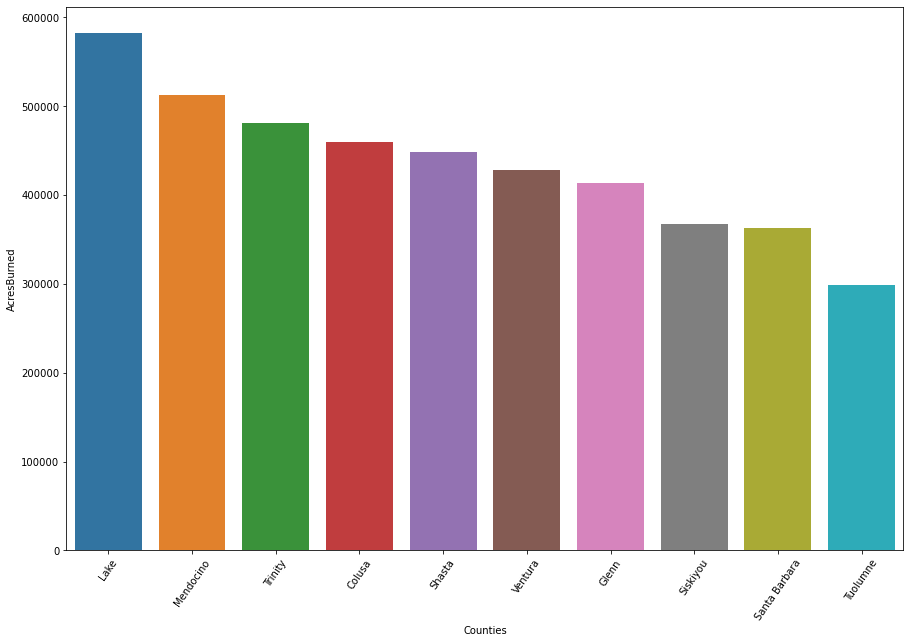

In [44]:

#graphing top 10 counties acres burned with seaborn
fig, ax = plt.subplots(figsize=(15,10))
chart = sns.barplot(data=top_ten_counties_df,
            x=top_ten_counties_df.index,
            y="AcresBurned",ax=ax)

#rotate xaxis
chart.set_xticklabels(chart.get_xticklabels(), rotation=55);